In [1]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import h5py, os
import joblib

from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.multiclass import OneVsOneClassifier

from sklearn import metrics

In [2]:
h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    OneVsOneClassifier(SVC(gamma=0.7, C=1)),
    #GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

In [3]:
root_dir = os.path.join(os.path.dirname(os.getcwd()), '2021_09_22_new_gestures')

def parse_h5_folder(root_dir, dir_path):
    dir_path = os.path.join(root_dir, dir_path)
    h5_files = [path for path in os.listdir(dir_path) if path.endswith('.h5')]
    radarDataOneGesture = []
    for file_path in h5_files:
        hf = h5py.File(os.path.join(dir_path, file_path), 'r')
        radarDataOneGesture.append(np.squeeze(np.array(hf['/data'])).T)
        hf.close()
    return radarDataOneGesture

all_dir = [sub_dir for sub_dir in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, sub_dir))]

radarDataAll = []
labels = []
label_words = ['push', 'rolling', 'pinching', 'swing']

for label, dir_path in enumerate(all_dir):
    print(dir_path)
    radarDataAll.append(parse_h5_folder(root_dir, dir_path))
    labels.append([label for _ in range(len(radarDataAll[0]))])

radarDataAll = np.array(radarDataAll)
labels = np.array(labels)

Ngestures, Nsamples, NTS, Nframes= radarDataAll.shape
print(radarDataAll.shape, labels.shape, end='\n\n')

radarDataMagnitude = np.abs(radarDataAll.reshape(-1, Nframes*NTS))
finalLabels = labels.reshape(-1)

X = radarDataMagnitude
y = finalLabels

push = X[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], :]
rolling = X[[10, 11, 12, 13, 14, 15, 16, 17, 18, 19], :]
pinching = X[[20, 21, 22, 23, 24, 25, 26, 27, 28, 29], :]
swing = X[[30, 31, 32, 33, 34, 35, 36, 37, 38, 39], :]

print('Input features shape:', radarDataMagnitude.shape)
print('Labels shape:', finalLabels.shape)

Gesture 1 - Push
Gesture 2 - Rolling Forward
Gesture 3 - Pinching
Gesture 4 - Swing
(4, 10, 621, 64) (4, 10)

Input features shape: (40, 39744)
Labels shape: (40,)


KNeighborsClassifier(n_neighbors=3) Model
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8928571428571429

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5

Predcited values:  [2 3 2 2 0 1 2 2 3 3 2 2]
Actual values:     [2 3 0 1 1 1 2 1 1 3 3 2]
SVC(C=0.025, kernel='linear') Model
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 1.0

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8333333333333334

Predcited values:  [2 3 0 2 1 1 2 1 3 3 3 2]
Actual values:     [2 3 0 1 1 1 2 1 1 3 3 2]
OneVsOneClassifier(estimator=SVC(C=1, gamma=0.7)) Model
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 1.0

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.08333333333333333

Predcited values:  [0 0 0 0 0 0 0 0 0 0 0 0]
Actual values:     [2 3 0 1 1 1 2 1 1 3 3 2]
DecisionTreeClassifier(max_depth=5) Model
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 1.0

Goodnes

C:\Users\WY LEE\.conda\envs\dip\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Predcited values:  [1 1 2 2 1 0 1 1 1 1 1 1]
Actual values:     [2 3 0 1 1 1 2 1 1 3 3 2]


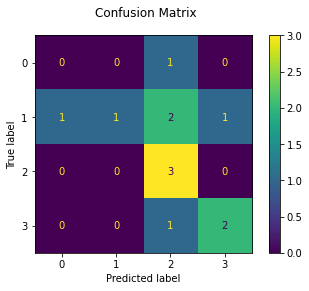

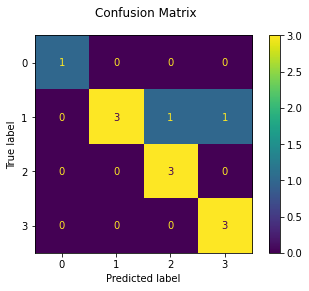

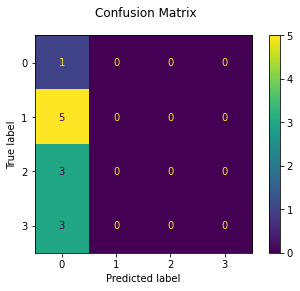

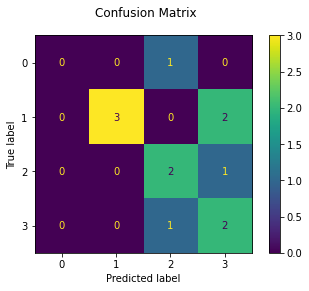

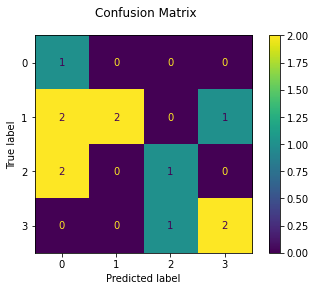

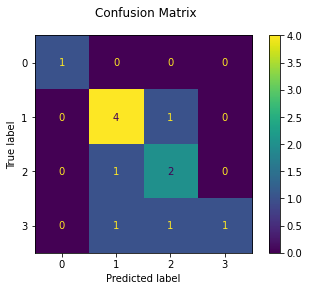

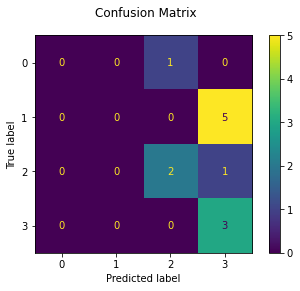

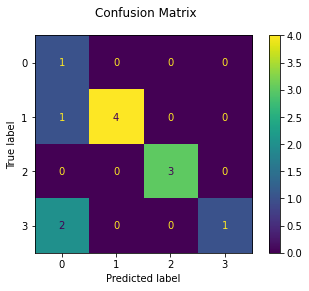

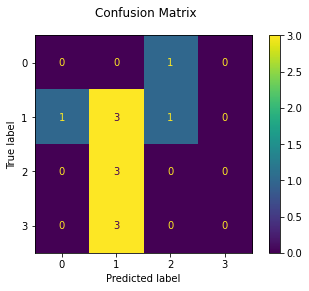

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=12)

for cf, cf_name in zip(classifiers, names):
    # Learn the digits on the train subset
    cf.fit(X_train, y_train)

    joblib.dump(cf, f'Trained model/{cf_name}.pkl')               # Save the model as a pickle in a file
    model = joblib.load(f'Trained model/{cf_name}.pkl')           # Load the model from the file

    print(f"{cf} Model")
    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Classification Accuracy \t:", model.score(X_train, y_train), end='\n\n')

    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Classification Accuracy \t:", model.score(X_test, y_test), end='\n\n')

    disp = metrics.plot_confusion_matrix(model, X_test, y_test)
    disp.figure_.suptitle("Confusion Matrix")
    # print(f"Confusion matrix:\n{disp.confusion_matrix}")
    # plt.show()

    # Use the loaded model to make predictions
    print("Predcited values: ", model.predict(X_test))
    print("Actual values:    ", y_test)

## KNN model

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8928571428571429

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5

Confusion matrix:
[[0 0 1 0]
 [1 1 2 1]
 [0 0 3 0]
 [0 0 1 2]]


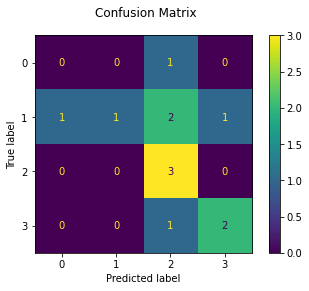

Predcited values:  [2 3 2 2 0 1 2 2 3 3 2 2]
Actual values:     [2 3 0 1 1 1 2 1 1 3 3 2]


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=12)

knn = classifiers[0]
# Learn the digits on the train subset
knn.fit(X_train, y_train)
 
# Save the model as a pickle in a file
joblib.dump(knn, 'knn.pkl')
 
# Load the model from the file
knn_from_joblib = joblib.load('knn.pkl')

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", knn.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", knn.score(X_test, y_test))
print()

disp = metrics.plot_confusion_matrix(knn, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

# Use the loaded model to make predictions
print("Predcited values: ", knn_from_joblib.predict(X_test))
print("Actual values:    ", y_test)

## linearSVM model

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 1.0

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8333333333333334

Confusion matrix:
[[1 0 0 0]
 [0 3 1 1]
 [0 0 3 0]
 [0 0 0 3]]


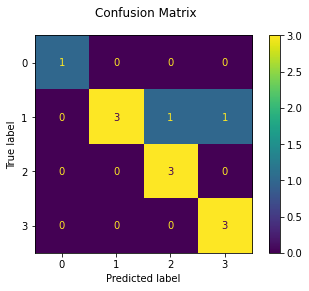

array([2, 3, 0, 2, 1, 1, 2, 1, 3, 3, 3, 2])

In [265]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=12)

linearSVM = classifiers[1]
# Learn the digits on the train subset
linearSVM.fit(X_train, y_train)

# Save the model as a pickle in a file
joblib.dump(linearSVM, 'linearSVM.pkl')
 
# Load the model from the file
linearSVM_from_joblib = joblib.load('linearSVM.pkl')

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", linearSVM.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", linearSVM.score(X_test, y_test))
print()

disp = metrics.plot_confusion_matrix(linearSVM, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

# Use the loaded model to make predictions
linearSVM_from_joblib.predict(X_test)

## rbfSVM model

### still got problem need to fix

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 1.0

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.08333333333333333

Confusion matrix:
[[1 0 0 0]
 [5 0 0 0]
 [3 0 0 0]
 [3 0 0 0]]


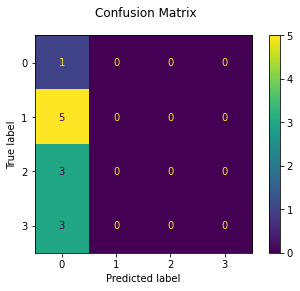

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=12)

rbfSVM = classifiers[2]
rbfSVM.decision_function_shape = "ovo"
# Learn the digits on the train subset
rbfSVM.fit(X_train, y_train)

# Save the model as a pickle in a file
joblib.dump(rbfSVM, 'rbfSVM.pkl')
 
# Load the model from the file
rbfSVM_from_joblib = joblib.load('rbfSVM.pkl')

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rbfSVM.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rbfSVM.score(X_test, y_test))
print()

disp = metrics.plot_confusion_matrix(rbfSVM, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

# Use the loaded model to make predictions
rbfSVM_from_joblib.predict(X_test)

## Gaussian Process model

### still got problem

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 1.0

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.25

Confusion matrix:
[[0 0 0 1]
 [0 0 0 5]
 [0 0 0 3]
 [0 0 0 3]]


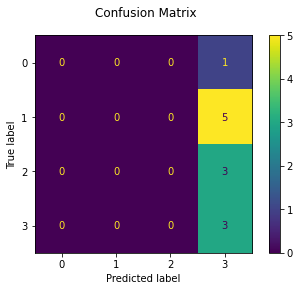

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [267]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=12)

GaussianProcess = classifiers[3]
# Learn the digits on the train subset
GaussianProcess.fit(X_train, y_train)

# Save the model as a pickle in a file
joblib.dump(GaussianProcess, 'GaussianProcess.pkl')
 
# Load the model from the file
GaussianProcess_from_joblib = joblib.load('GaussianProcess.pkl')

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", GaussianProcess.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", GaussianProcess.score(X_test, y_test))
print()

disp = metrics.plot_confusion_matrix(GaussianProcess, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

# Use the loaded model to make predictions
GaussianProcess_from_joblib.predict(X_test)

## Decision Tree Model

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 1.0

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5833333333333334

Confusion matrix:
[[1 0 0 0]
 [0 2 1 2]
 [0 1 2 0]
 [0 0 1 2]]


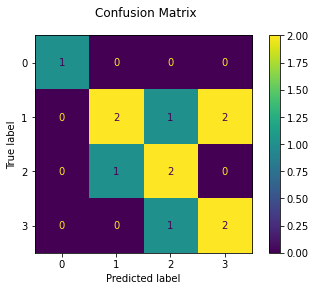

array([2, 2, 0, 3, 2, 1, 1, 1, 3, 3, 3, 2])

In [268]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=12)

DecisionTree = classifiers[4]
# Learn the digits on the train subset
DecisionTree.fit(X_train, y_train)

# Save the model as a pickle in a file
joblib.dump(DecisionTree, 'DecisionTree.pkl')
 
# Load the model from the file
DecisionTree_from_joblib = joblib.load('DecisionTree.pkl')

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", DecisionTree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", DecisionTree.score(X_test, y_test))
print()

disp = metrics.plot_confusion_matrix(DecisionTree, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

# Use the loaded model to make predictions
DecisionTree_from_joblib.predict(X_test)

## Random Forest model

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 1.0

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.3333333333333333

Confusion matrix:
[[1 0 0 0]
 [2 1 1 1]
 [1 0 1 1]
 [1 0 1 1]]


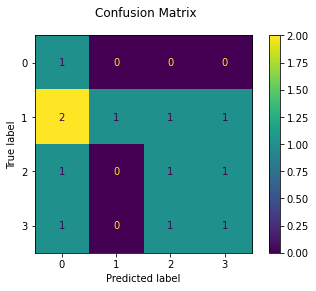

array([2, 2, 0, 0, 2, 1, 0, 0, 3, 3, 0, 3])

In [269]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=12)

RandomForest = classifiers[5]
# Learn the digits on the train subset
RandomForest.fit(X_train, y_train)

# Save the model as a pickle in a file
joblib.dump(RandomForest, 'RandomForest.pkl')
 
# Load the model from the file
RandomForest_from_joblib = joblib.load('RandomForest.pkl')

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", RandomForest.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", RandomForest.score(X_test, y_test))
print()

disp = metrics.plot_confusion_matrix(RandomForest, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

# Use the loaded model to make predictions
RandomForest_from_joblib.predict(X_test)

## Neural network model

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 1.0

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5833333333333334

Confusion matrix:
[[1 0 0 0]
 [1 4 0 0]
 [0 1 2 0]
 [2 1 0 0]]


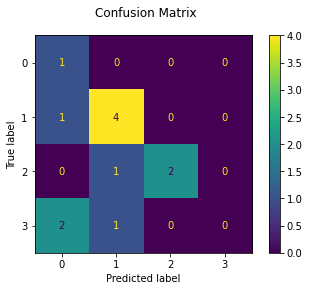

array([1, 0, 0, 0, 1, 1, 2, 1, 1, 0, 1, 2])

In [270]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=12)

NeuralNetwork = classifiers[6]
# Learn the digits on the train subset
NeuralNetwork.fit(X_train, y_train)

# Save the model as a pickle in a file
joblib.dump(NeuralNetwork, 'NeuralNetwork.pkl')
 
# Load the model from the file
NeuralNetwork_from_joblib = joblib.load('NeuralNetwork.pkl')

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", NeuralNetwork.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", NeuralNetwork.score(X_test, y_test))
print()

disp = metrics.plot_confusion_matrix(NeuralNetwork, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

# Use the loaded model to make predictions
NeuralNetwork_from_joblib.predict(X_test)

## AdaBoost Model

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6071428571428571

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.4166666666666667

Confusion matrix:
[[0 0 1 0]
 [0 0 0 5]
 [0 0 2 1]
 [0 0 0 3]]


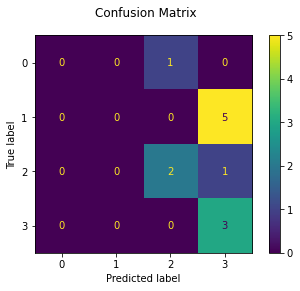

array([2, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3])

In [271]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=12)

AdaBoost = classifiers[7]
# Learn the digits on the train subset
AdaBoost.fit(X_train, y_train)

# Save the model as a pickle in a file
joblib.dump(AdaBoost, 'AdaBoost.pkl')
 
# Load the model from the file
AdaBoost_from_joblib = joblib.load('AdaBoost.pkl')

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", AdaBoost.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", AdaBoost.score(X_test, y_test))
print()

disp = metrics.plot_confusion_matrix(AdaBoost, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

# Use the loaded model to make predictions
AdaBoost_from_joblib.predict(X_test)

## Naive Bayes Model

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 1.0

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.75

Confusion matrix:
[[1 0 0 0]
 [1 4 0 0]
 [0 0 3 0]
 [2 0 0 1]]


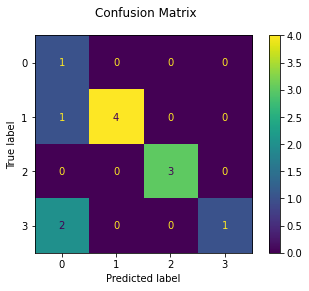

array([2, 0, 0, 0, 1, 1, 2, 1, 1, 3, 0, 2])

In [272]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=12)

NaiveBayes = classifiers[8]
# Learn the digits on the train subset
NaiveBayes.fit(X_train, y_train)

# Save the model as a pickle in a file
joblib.dump(NaiveBayes, 'NaiveBayes.pkl')
 
# Load the model from the file
NaiveBayes_from_joblib = joblib.load('NaiveBayes.pkl')

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", NaiveBayes.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", NaiveBayes.score(X_test, y_test))
print()

disp = metrics.plot_confusion_matrix(NaiveBayes, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

# Use the loaded model to make predictions
NaiveBayes_from_joblib.predict(X_test)

## Quadratic Discriminant Analysis (QDA)

C:\Users\Thum Yi Wen\Downloads\anaconda\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 1.0

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.25

Confusion matrix:
[[0 0 1 0]
 [1 3 1 0]
 [0 3 0 0]
 [0 3 0 0]]


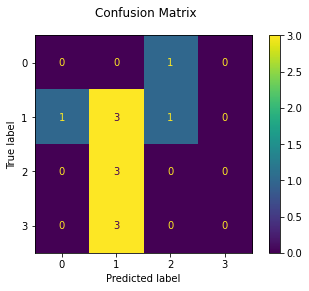

array([1, 1, 2, 2, 1, 0, 1, 1, 1, 1, 1, 1])

In [273]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=12)

QDA = classifiers[9]
# Learn the digits on the train subset
QDA.fit(X_train, y_train)

# Save the model as a pickle in a file
joblib.dump(QDA, 'QDA.pkl')
 
# Load the model from the file
QDA_from_joblib = joblib.load('QDA.pkl')

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", QDA.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", QDA.score(X_test, y_test))
print()

disp = metrics.plot_confusion_matrix(QDA, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

# Use the loaded model to make predictions
QDA_from_joblib.predict(X_test)

## Linear Discriminant Analysis(LDA)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.75

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6666666666666666

Confusion matrix:
[[1 0 0 0]
 [0 1 4 0]
 [0 0 3 0]
 [0 0 0 3]]


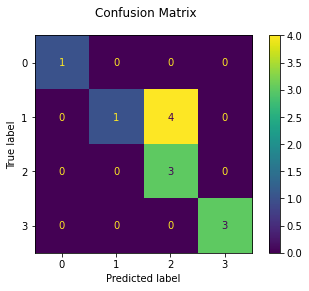

array([2, 3, 0, 2, 2, 1, 2, 2, 2, 3, 3, 2])

In [274]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=12)

LinearDiscriminantAnalysis = LinearDiscriminantAnalysis()
# Learn the digits on the train subset
LinearDiscriminantAnalysis.fit(X_train, y_train)

# Save the model as a pickle in a file
joblib.dump(LinearDiscriminantAnalysis, 'LinearDiscriminantAnalysis.pkl')
 
# Load the model from the file
LinearDiscriminantAnalysis_from_joblib = joblib.load('LinearDiscriminantAnalysis.pkl')

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", LinearDiscriminantAnalysis.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", LinearDiscriminantAnalysis.score(X_test, y_test))
print()

disp = metrics.plot_confusion_matrix(LinearDiscriminantAnalysis, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

# Use the loaded model to make predictions
LinearDiscriminantAnalysis_from_joblib.predict(X_test)

## Logistic Regression Model

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 1.0

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.75

Confusion matrix:
[[1 0 0 0]
 [0 2 2 1]
 [0 0 3 0]
 [0 0 0 3]]


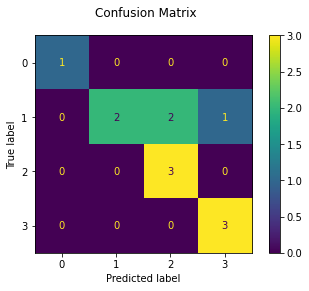

array([2, 3, 0, 2, 1, 1, 2, 2, 3, 3, 3, 2])

In [275]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=12)

logisticregression = LogisticRegression(random_state=12)
# Learn the digits on the train subset
logisticregression.fit(X_train, y_train)

# Save the model as a pickle in a file
joblib.dump(logisticregression, 'logisticregression.pkl')
 
# Load the model from the file
logisticregression_from_joblib = joblib.load('logisticregression.pkl')

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", logisticregression.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", logisticregression.score(X_test, y_test))
print()

disp = metrics.plot_confusion_matrix(logisticregression, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

# Use the loaded model to make predictions
logisticregression_from_joblib.predict(X_test)